# Statistics

We import the data and then do a some preprocessing in order to  have a clean dataset. It is important to remove stablecoins, this was done by filtering those whose standard deviation of returns ona weekly basis was low.

In [49]:
import pandas as pd

data_d = pd.read_csv(r"C:\Users\USER\OneDrive\Escritorio\Memoria\Memoria_LA\Codigos\Daily_data.csv")
data_w = pd.read_csv(r"C:\Users\USER\OneDrive\Escritorio\Memoria\Memoria_LA\Codigos\Weekly_data.csv")

# Dropping null values from data_d
data_d.dropna(inplace=True)

# Dropping null values from data_w
data_w.dropna(inplace=True)

# Optional: Resetting index after dropping rows
data_d.reset_index(drop=True, inplace=True)
data_w.reset_index(drop=True, inplace=True)

# List of symbols to remove
symbols_to_remove = ['FDUSD-USD', 'USDC-USD', 'USDT-USD', 'TUSD-USD', 'FRAX-USD', 'DAI-USD', 'USDD-USD']

# Removing rows with specified symbols from data_d
data_d = data_d[~data_d['Symbol'].isin(symbols_to_remove)]

# Removing rows with specified symbols from data_w
data_w = data_w[~data_w['Symbol'].isin(symbols_to_remove)]

# Optional: Resetting index after dropping rows
data_d.reset_index(drop=True, inplace=True)
data_w.reset_index(drop=True, inplace=True)





In [50]:
# Calculate daily returns
data_d['Daily Returns'] = data_d.groupby('Symbol')['Adj Close'].pct_change()

# Calculate statistics for daily returns
daily_stats_returns = data_d.groupby('Symbol').agg({
    'Daily Returns': ['mean', 'median', 'std', 'min', 'max', lambda x: x.quantile(0.1), lambda x: x.quantile(0.9), lambda x: x.autocorr(lag=1)]
})

daily_stats_returns.columns = ['Mean', 'Median', 'Standard Deviation', 'Minimum', 'Maximum', '10th Percentile', '90th Percentile', 'AR(1)']

# Display the results
daily_stats_returns


,Mean,Median,Standard Deviation,Minimum,Maximum,10th Percentile,90th Percentile,AR(1)
Symbol,,,,,,,,
0X0-USD,0.027900,0.006319,0.150522,-0.301506,1.241503,-0.119230,0.193700,-0.019764
1000SATS-USD,0.006016,-0.013605,0.092264,-0.169583,0.480469,-0.067198,0.090385,-0.222025
1INCH-USD,0.000870,0.000393,0.062334,-0.384794,0.435839,-0.065604,0.065585,0.002365
AAVE-USD,0.083677,0.000527,2.874515,-0.338302,101.892905,-0.063410,0.070635,-0.004807
ADA-USD,0.003422,0.000406,0.069037,-0.395672,1.366810,-0.060933,0.063321,0.004082
...,...,...,...,...,...,...,...,...
ZBU-USD,0.007430,0.007394,0.033797,-0.079716,0.148426,-0.036909,0.041244,0.170345
ZEC-USD,0.000717,-0.000153,0.056263,-0.416922,0.297870,-0.061159,0.061789,-0.062057
ZETA-USD,270.347484,0.000000,2743.731575,-0.985841,27845.833774,-0.069334,0.124595,-0.009903


In [51]:
# Calculate weekly returns
data_w['Weekly Returns'] = data_w.groupby('Symbol')['Adj Close'].pct_change()

# Calculate statistics for weekly returns
weekly_stats_returns = data_w.groupby('Symbol').agg({
    'Weekly Returns': ['mean', 'median', 'std', 'min', 'max', lambda x: x.quantile(0.1), lambda x: x.quantile(0.9), lambda x: x.autocorr(lag=1)]
})

weekly_stats_returns.columns = ['Mean', 'Median', 'Standard Deviation', 'Minimum', 'Maximum', '10th Percentile', '90th Percentile', 'AR(1)']

# Display the results
weekly_stats_returns


,Mean,Median,Standard Deviation,Minimum,Maximum,10th Percentile,90th Percentile,AR(1)
Symbol,,,,,,,,
0X0-USD,0.179201,0.060787,0.422563,-0.356577,2.046750,-0.122497,0.437383,0.078439
1000SATS-USD,0.004715,-0.009295,0.126824,-0.201342,0.198519,-0.123686,0.163664,0.072830
1INCH-USD,0.002942,-0.008147,0.134311,-0.372697,0.761665,-0.144782,0.144710,0.352167
AAVE-USD,0.017399,0.001166,0.145026,-0.362185,0.669737,-0.127609,0.202129,0.279480
ADA-USD,0.024445,-0.000718,0.215243,-0.331829,2.709124,-0.130029,0.155193,0.218590
...,...,...,...,...,...,...,...,...
ZBU-USD,0.050794,0.046103,0.081159,-0.078346,0.319858,-0.035584,0.116782,0.186405
ZEC-USD,0.001440,-0.009863,0.124389,-0.380326,0.521037,-0.136142,0.156984,0.193093
ZETA-USD,1205.391568,0.010638,4668.345472,-0.987850,18080.454159,-0.178164,0.680496,-0.076901


In [52]:
# Get symbols with null standard deviation for daily returns
symbols_null_std_daily = daily_stats_returns[daily_stats_returns['Standard Deviation'].isnull()].index.tolist()

# Filter out symbols with null standard deviation from data_d
data_d = data_d[~data_d['Symbol'].isin(symbols_null_std_daily)]

# Get symbols with null standard deviation for weekly returns
symbols_null_std_weekly = weekly_stats_returns[weekly_stats_returns['Standard Deviation'].isnull()].index.tolist()

# Filter out symbols with null standard deviation from data_w
data_w = data_w[~data_w['Symbol'].isin(symbols_null_std_weekly)]

In [53]:
data_d.to_excel("Crypto_daily_data.xlsx", index=False)
data_w.to_excel("Crypto_weekly_data.xlsx", index=False)
daily_stats_returns.to_excel("Daily_stats.xlsx")
weekly_stats_returns.to_excel("Weekly_stats.xlsx")

## First-order autoregressive coefficient

The AR(1) coefficient represents the linear relationship between a value at time (t) and its previous value at time (t-1). It quantifies how much the current value depends on the immediately preceding value.

* **If the AR(1) coefficient is positive:**
    
    A positive AR(1) indicates that an increase in the previous value tends to lead to an increase in the current value.
    It suggests momentum or persistence in the time series data.
    For example, if stock prices have a positive AR(1) coefficient, a rising stock price today is likely to be followed by another increase tomorrow.
* **If the AR(1) coefficient is negative:**
    
    A negative AR(1) indicates that an increase in the previous value tends to lead to a decrease in the current value.   
    It suggests reversion to the mean or mean-reverting behavior.
    For instance, if temperature has a negative AR(1) coefficient, an unusually warm day today might be followed by a cooler day tomorrow.
* **If the AR(1) coefficient is close to zero:**
    
    A value close to zero implies weak dependence between consecutive observations.
    The time series data may exhibit more randomness or noise.
    In this case, the current value is less influenced by the previous value.

## Graphs

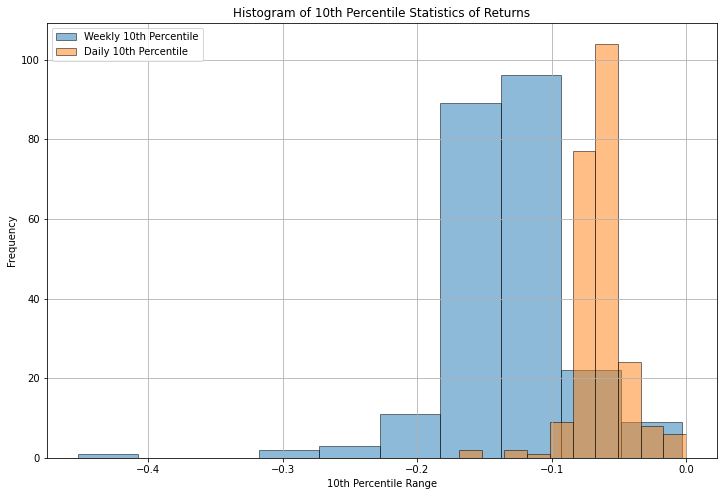

In [54]:
import matplotlib.pyplot as plt
var = "10th Percentile"

# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.hist(weekly_stats_returns[var], bins=10, edgecolor='black', alpha=0.5, label=f'Weekly {var}')
plt.hist(daily_stats_returns[var], bins=10, edgecolor='black', alpha=0.5, label=f'Daily {var}')
plt.xlabel(f'{var} Range')
plt.ylabel('Frequency')
plt.title(f'Histogram of {var} Statistics of Returns')
plt.legend()
plt.grid(True)
plt.show()


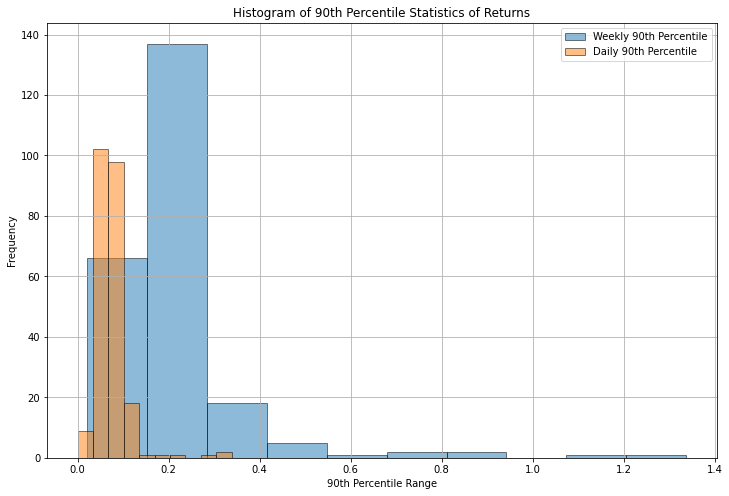

In [55]:
var = "90th Percentile"

# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.hist(weekly_stats_returns[var], bins=10, edgecolor='black', alpha=0.5, label=f'Weekly {var}')
plt.hist(daily_stats_returns[var], bins=10, edgecolor='black', alpha=0.5, label=f'Daily {var}')
plt.xlabel(f'{var} Range')
plt.ylabel('Frequency')
plt.title(f'Histogram of {var} Statistics of Returns')
plt.legend()
plt.grid(True)
plt.show()

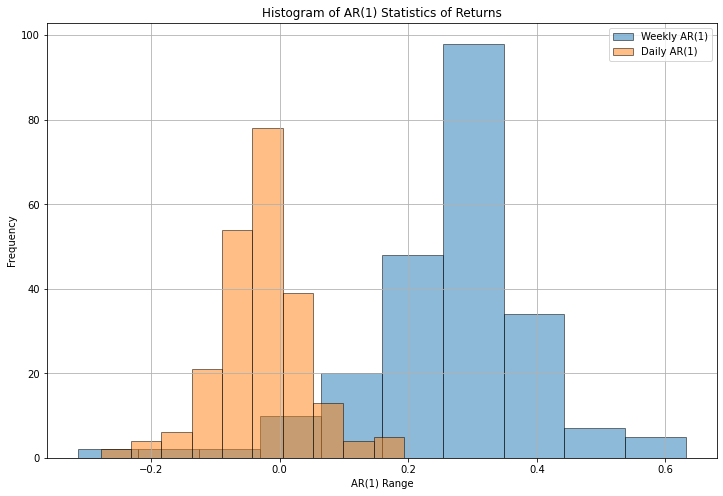

In [56]:
var = "AR(1)"

# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.hist(weekly_stats_returns[var], bins=10, edgecolor='black', alpha=0.5, label=f'Weekly {var}')
plt.hist(daily_stats_returns[var], bins=10, edgecolor='black', alpha=0.5, label=f'Daily {var}')
plt.xlabel(f'{var} Range')
plt.ylabel('Frequency')
plt.title(f'Histogram of {var} Statistics of Returns')
plt.legend()
plt.grid(True)
plt.show()